Berner Fachhochschule BFH - MAS Data Science - Graph Machine Learning - Master Thesis FS/2022 Thomas Iten

# Experiment 5 - Similarity with Community

**Referenzen**<br />
[1] https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html<br />
[2] Stamile, Marzullo, Deusebio. Graph Machine Learning. Packt Publishing 2021. ISBN 978-1-80020-449-2



In [1]:
from gml.graph.graph_link import GraphLink, Algorithm
from gml.graph.graph_builder import GraphBuilder
from gml.graph.data_factory import DataFactory, EdgeLabelFactory

## 4.1 Data Structure

### Datensammlung - Mitarbeiter mit Organisation und Communities

<img src="img/test-5-community.png" alt="Test 5" width="800"/>

## 4.2 Exploration

### Create graph and link predictions for all missing edges

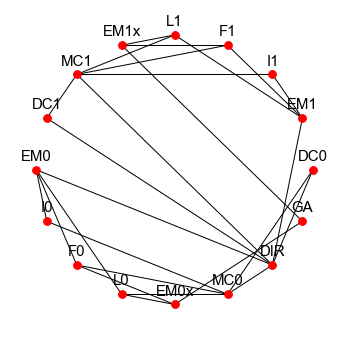

Link Predictions:
            Edge  SH        SI           IC        CN
0    (EM0, EM0x)   2  0.000000     0.000000  3.200000
1     (EM0, MC0)   5  0.166667     0.333222  4.800000
2      (EM0, GA)   0  0.000000     0.000000  1.066667
3     (EM0, DC0)   2  0.166667  1000.000000  2.400000
4     (EM0, EM1)   2  0.166667  1000.000000  2.400000
5      (EM0, I1)   0  0.000000     0.000000  1.066667
6      (EM0, F1)   0  0.000000     0.000000  1.066667
7      (EM0, L1)   0  0.000000     0.000000  1.066667
8    (EM0, EM1x)   0  0.000000     0.000000  0.800000
9     (EM0, MC1)   2  0.166667  1000.000000  2.400000
10    (EM0, DC1)   2  0.166667  1000.000000  2.400000
11      (I0, F0)   2  0.000000     0.000000  3.200000
12      (I0, L0)   2  0.000000     0.000000  3.200000
13    (I0, EM0x)   0  0.000000     0.000000  1.066667
14     (I0, DIR)   2  0.000000     0.000000  3.200000
15      (I0, GA)   0  0.000000     0.000000  0.800000
16     (I0, DC0)   1  0.000000     0.000000  2.400000
17     (I0

In [2]:
edges = DataFactory().create_graph_with_doubles(n=2, add_dc=True).edges
community_0 = (0, ['DIR','MC0','DC0','EM0','MC1','DC1','EM1'])
community_1 = (1, ['GA','EM0x','EM1x'])
community_2 = (2, ['I0', 'F0', 'L0','I1', 'F1', 'L1'])

graph = GraphBuilder()\
    .append_edges(edges)\
    .append_communities([community_0, community_1, community_2])\
    .create()
graph.draw()

possible_edges = graph.missing_edges()

gl = GraphLink(graph, possible_edges)\
    .predict(Algorithm.SOUNDARAJAN_HOPCROFT)\
    .predict(Algorithm.SOUNDARAJAN_HOPCROFT_INDEX)\
    .predict(Algorithm.WITHIN_INTER_CLUSTER)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)

gl.print_results(title="Link Predictions:")

### Normalize results, filter edges of interest, label results and show metrics

In [3]:
gl.normalize()
gl.filter([("EM0","DC0"),("EM0", "DC1"),("EM1","DC0"),("EM1", "DC1"),
           ("EM0x","DC0"),("EM0x", "DC1"),("EM1x","DC0"),("EM1x", "DC1")])

gl.print_results(title="Predictions normalized:", incl_legend=False)
print()

gl.label(threshold=0.8)
gl.print_results(title="Prediction labels with threshold 0.8:", incl_legend=False)
print()

y_true = [1,0,0,1,0,0,0,0]
gl.print_metrics(y_true, title="Metrics:")

Predictions normalized:
          Edge   SH        SI   IC        CN
0   (EM0, DC0)  0.4  0.333333  1.0  0.500000
1   (EM0, DC1)  0.4  0.333333  1.0  0.500000
2   (EM1, DC0)  0.4  0.333333  1.0  0.500000
3   (EM1, DC1)  0.4  0.333333  1.0  0.500000
4  (EM0x, DC0)  0.0  0.000000  0.0  0.222222
5  (EM0x, DC1)  0.0  0.000000  0.0  0.166667
6  (EM1x, DC0)  0.0  0.000000  0.0  0.166667
7  (EM1x, DC1)  0.0  0.000000  0.0  0.222222

Prediction labels with threshold 0.8:
          Edge  SH  SI  IC  CN
0   (EM0, DC0)   0   0   1   0
1   (EM0, DC1)   0   0   1   0
2   (EM1, DC0)   0   0   1   0
3   (EM1, DC1)   0   0   1   0
4  (EM0x, DC0)   0   0   0   0
5  (EM0x, DC1)   0   0   0   0
6  (EM1x, DC0)   0   0   0   0
7  (EM1x, DC1)   0   0   0   0

Metrics:
      Metric   SH   SI        IC   CN
0  Precision  0.0  0.0  0.500000  0.0
1     Recall  0.0  0.0  1.000000  0.0
2   F1-Score  0.0  0.0  0.666667  0.0

Legend:
  SH  = Soundarajan Hopcroft
  SI  = Index Soundarajan Hopcroft
  IC  = Within Int

## 4.3 Tests

### Create link predictions and show metrics for edge samples of interest

In [4]:
n = 100
edges = DataFactory().create_graph_with_doubles(n=n, add_dc=True).edges

nodes_0 = ['DIR']
nodes_1 = ['GA']
nodes_2 = []
for i in range(n):
    idx = str(i)
    nodes_0.append('MC' + idx)
    nodes_0.append('DC' + idx)
    nodes_0.append('EM' + idx)
    nodes_1.append('EM' + idx + 'x')
    nodes_2.append('I' + idx)
    nodes_2.append('F' + idx)
    nodes_2.append('L' + idx)
community_0 = (0, nodes_0)
community_1 = (1, nodes_1)
community_2 = (2, nodes_2)

graph = GraphBuilder()\
    .append_edges(edges)\
    .append_communities([community_0, community_1, community_2])\
    .create()

edges, labels = EdgeLabelFactory().sample("DC", "EM", n, p=0.1, shuffle=True)

gl = GraphLink(graph, edges)\
    .predict(Algorithm.SOUNDARAJAN_HOPCROFT)\
    .predict(Algorithm.SOUNDARAJAN_HOPCROFT_INDEX)\
    .predict(Algorithm.WITHIN_INTER_CLUSTER)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)

gl.normalize()
gl.label(threshold=0.8)
gl.print_metrics(labels)

Metrics
      Metric        SH        SI        IC        CN
0  Precision  0.500000  0.500000  0.500000  0.500000
1     Recall  1.000000  1.000000  1.000000  1.000000
2   F1-Score  0.666667  0.666667  0.666667  0.666667

Legend:
  SH  = Soundarajan Hopcroft
  SI  = Index Soundarajan Hopcroft
  IC  = Within Inter Cluster
  CN  = Common Neighbor Centrality


### Create link predcitions for all possible edges first and then show metrics for edge samples of interest

In [6]:
n = 100
edges = DataFactory().create_graph_with_doubles(n=n, add_dc=True).edges

nodes_0 = ['DIR']
nodes_1 = ['GA']
nodes_2 = []
for i in range(n):
    idx = str(i)
    nodes_0.append('MC' + idx)
    nodes_0.append('DC' + idx)
    nodes_0.append('EM' + idx)
    nodes_1.append('EM' + idx + 'x')
    nodes_2.append('I' + idx)
    nodes_2.append('F' + idx)
    nodes_2.append('L' + idx)
community_0 = (0, nodes_0)
community_1 = (1, nodes_1)
community_2 = (2, nodes_2)

graph = GraphBuilder()\
    .append_edges(edges)\
    .append_communities([community_0, community_1, community_2])\
    .create()

possible_edges =  graph.missing_edges()

gl = GraphLink(graph, possible_edges)\
    .predict(Algorithm.SOUNDARAJAN_HOPCROFT)\
    .predict(Algorithm.SOUNDARAJAN_HOPCROFT_INDEX)\
    .predict(Algorithm.WITHIN_INTER_CLUSTER)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)

gl.normalize()

edges, labels = EdgeLabelFactory().sample("DC", "EM", n, p=0.1, shuffle=True)
gl.filter(edges)

gl.label(threshold=0.8)
gl.print_metrics(labels)

Metrics
      Metric   SH   SI        IC        CN
0  Precision  0.0  0.0  0.500000  0.500000
1     Recall  0.0  0.0  1.000000  1.000000
2   F1-Score  0.0  0.0  0.666667  0.666667

Legend:
  SH  = Soundarajan Hopcroft
  SI  = Index Soundarajan Hopcroft
  IC  = Within Inter Cluster
  CN  = Common Neighbor Centrality


---
_The end._